Ladataan tarvittavat kirjastot:

> pandas; matematiikkakirjasto - https://pandas.pydata.org/

> numpy; toinen matematiikkakirjasto - https://numpy.org/doc/

> matplotlib; visualisointikirjasto - https://matplotlib.org/

> seaborn; visualisointikirjasto - https://seaborn.pydata.org/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dat = pd.read_csv("https://raw.githubusercontent.com/rerkki/metropolia/master/voimalaitosdata_3.csv", encoding='latin-1')

dat[0:1] #tulostetaan otsikko ja ensimmäinen rivi tarkistuksen vuoksi


,AIKA,KATTILA_PAINE,KATTILA_SYÖTTÖVESI,ALIPAINE,SAVUKAASU_TILAVUUSVIRTA,LIERIÖ_PAINE,TUOREHÖYRY_PAINE,CO_PITOISUUS,O2_PITOISUUS,SAVUKAASU_INDEKSI,SYÖTTÖVESI_LÄMPÖTILA,SAVUKAASU_LÄMPÖTILA,TUOREHÖYRY_LÄMPÖTILA,HYÖTYSUHDE,MWh_INDEKSI
0,1.3.2014 0:00,5.816595,15.19714,0.359379,260.7792,83.48424,81.98222,19.48454,10.98951,12.07318,138.2302,168.5558,509.9592,0.842291,1


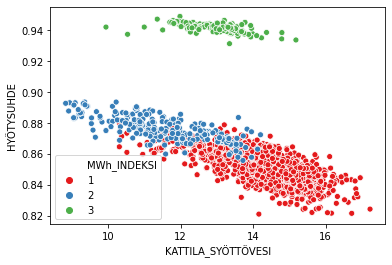

In [ ]:
sns.scatterplot(x=dat['KATTILA_SYÖTTÖVESI'], y=dat['HYÖTYSUHDE'], data=dat, hue='MWh_INDEKSI', palette='Set1');


**Tehtävä 1:**  Siivoa alla olevan koodin tuottamasta korrelaatiomatriisista sellaiset korrelaatiot pois, jotka ovat mielestäsi huonoja. Eli jätä matriisiin vain silmämääräisesti hyvät korrelaatiot.

Saat karsittua korrelaatiomatriisia, kun lisäät koodiriville 

df = dat.drop(columns=['ALIPAINE'])

lisää datasarakkeiden otsikoita, esim:

df = dat.drop(columns=['ALIPAINE','OTSIKKO1', 'OTSIKKO2'])


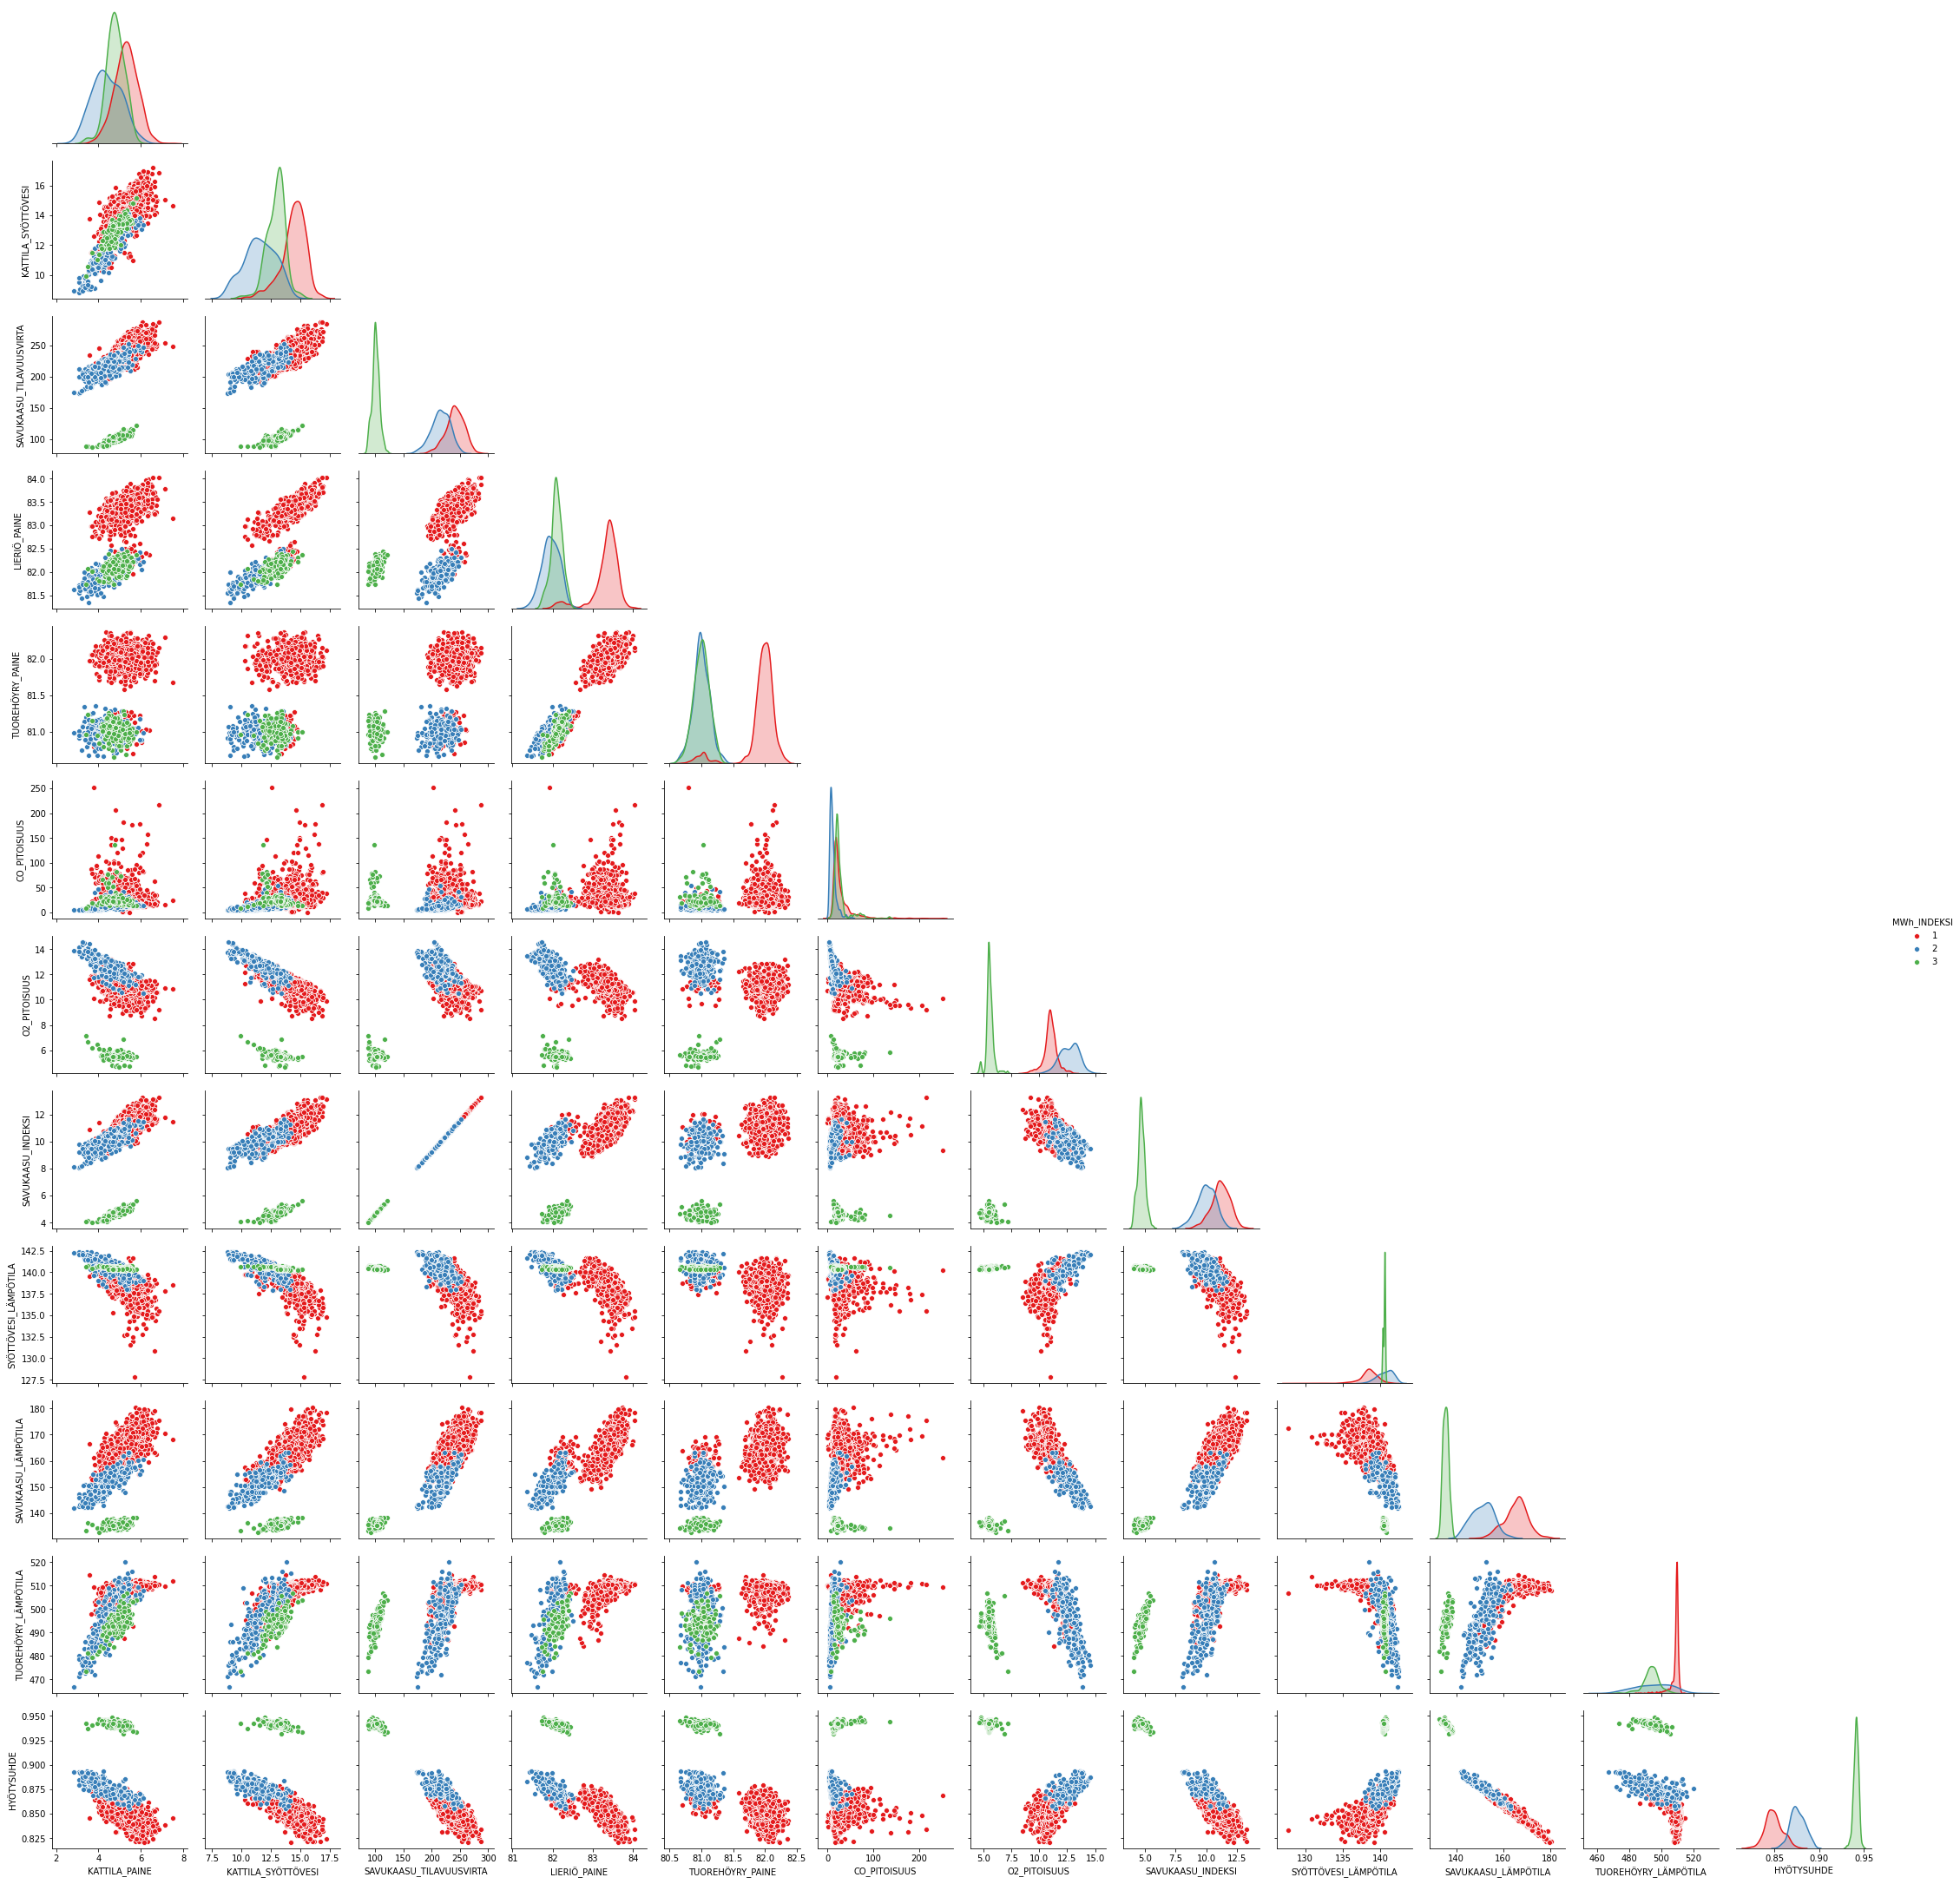

In [ ]:
df = dat.drop(columns=['ALIPAINE'])
sns.pairplot(data=df, hue='MWh_INDEKSI',  corner = True, palette='Set1');

**Tehtävä 2:**  Analysoi eri tilanteet (ennen optimointia, optimoinnin aikainen, optimoinnin jälkeinen) 

1.   antamalla alla olevaan koodiin ( selection = dat['MWh_INDEKSI'] == 3 ) eri tilanteiden indeksit,
2.   Lisäämällä koodiin ( X = dat_[['CO_PITOISUUS', 'LIERIÖ_PAINE']] ) sarakeotsikoita, jotka mielestäsi korreloivat hyvin hyötysuhteen kanssa.

Muista ajaa koodi joka muutoksen jälkeen.

*   Miten regressiomalli (saamasi kertoimet, kuva alhaalla) muuttuvat eri tilanteissa?
*   Miten mallin hyvyyttä kuvaava termi R2 muuttuu a) eri tilanteissa ja b) malliparametrien määrän mukaan?

Kopioi tulokset ja kuvat erilliseen dokumenttiin, kommentoi lyhyesti havaintosi, ja palauta selostus mielellään pdf-muodossa.



In [ ]:
selection = dat['MWh_INDEKSI'] == 3   #Tilanteet: 3 optimoitu, 2 optimoinnin aikainen, 1 ennen optimointia
dat_ = dat[selection]

In [ ]:


X = dat_[['CO_PITOISUUS', 'LIERIÖ_PAINE']]
Y = dat_[['HYÖTYSUHDE']]

labels = X.columns

LR = LinearRegression()
LR.fit(X,Y)
PRED=LR.predict(X)
R2 = r2_score(Y, PRED)
coef = LR.coef_[0]

print("r2 = ", R2)
print("Regression coefficients: ", coef)

plt.barh(labels,coef)
plt.show()
